In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('C:/Users/micronet computers/Desktop/Projects/Machine Learning/spam kaggle.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
X = df['Message']
y = df['Category']

In [40]:
#Encoding our lables ham and spam as 0 and 1
y_encode = LabelEncoder().fit_transform(y)
y_encode.shape

(5572,)

In [39]:
X_vector = TfidfVectorizer().fit_transform(X)
X_vector.shape

(5572, 8709)

In [14]:
#Let's split our dataset for train-test purpose
X_train, X_test, y_train, y_test=train_test_split(X_vector, y_encode, test_size=0.2, random_state=42)

In [18]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
print('Accuracy: ', model.score(X_train,y_train))

Accuracy:  1.0


In [23]:
score = cross_val_score(model, X_vector, y_encode, cv=5, scoring='accuracy')
print("Accuracy: ", score.mean())

Accuracy:  0.9750529341201665


### Prediction

In [25]:
y_pred = model.predict(X_test)

In [30]:
print('Out Sample Score: ', accuracy_score(y_test, y_pred))

Out Sample Score:  0.9802690582959641


     0    1
0  966    0
1   22  127


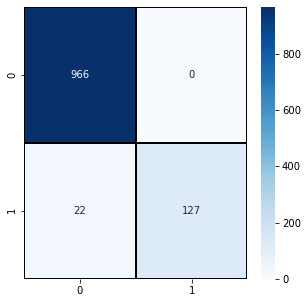

In [38]:
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, index=[i for i in range(2)], columns=[i for i in range(2)])
print(cm)
plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap='Blues',linecolor='black',linewidths=1, annot=True, fmt='')